### Importing libraries

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.preprocessing import image
import keras
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [404]:
df_train=pd.read_csv("./train.csv")

In [405]:
df_train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [406]:
df_test=pd.read_csv("./test.csv")

In [407]:
df_test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


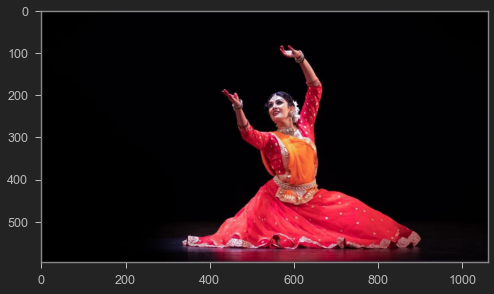

In [408]:
imag=os.listdir("train/")
img=image.load_img(os.path.join("train/",imag[0]))
x=image.img_to_array(img)/255.0
plt.imshow(x)

In [409]:
image_data={}
for path in os.listdir('train/'):
    img=os.path.join("train/",path)
    img=image.load_img(img,target_size=(100,100))
    img_arr=image.img_to_array(img)/255.0
    image_data[path]=img_arr

In [410]:
image_data_test=[]
labels_test=[]
for path in os.listdir('test/'):
    img=os.path.join("test/",path)
    img=image.load_img(img,target_size=(100,100))
    img_arr=image.img_to_array(img)/255.0
    image_data_test.append(img_arr)
    labels_test.append(path)

In [411]:
data_test_dict={}
for i in range(len(labels_test)):
    data_test_dict[labels_test[i]]=image_data_test[i]

In [412]:
df_test_id=df_test['Image']

In [413]:
X_test=[]
for i in range(df_test_id.shape[0]):
    X_test.append(data_test_dict[df_test_id[i]])

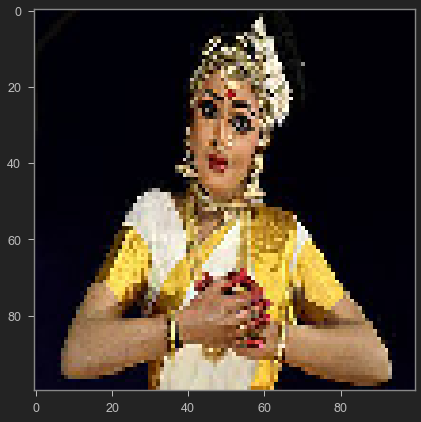

In [414]:
plt.imshow(X_test[1])

In [415]:
X_test=np.array(X_test)
print(X_test.shape)

(156, 100, 100, 3)


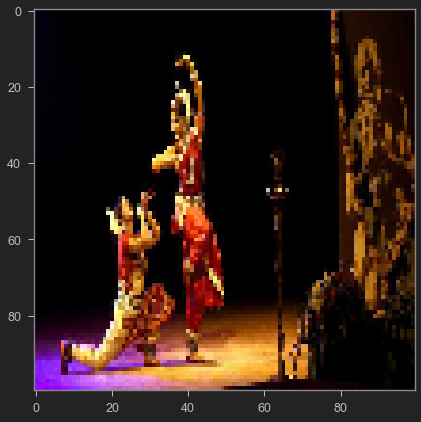

In [416]:
plt.imshow(X_test[0])

In [417]:
df_image_id=df_train['Image']
Y_train=df_train['target']

In [418]:
X_train=[]
for i in range(df_image_id.shape[0]):
    X_train.append(image_data[df_image_id[i]])
X_train=np.array(X_train)

In [419]:
X_train.shape

(364, 100, 100, 3)

In [420]:
le=LabelEncoder()

In [421]:
Y_train=le.fit_transform(np.array(Y_train))
Y_train=np_utils.to_categorical(Y_train)

In [422]:
le.classes_

array(['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi', 'manipuri',
       'mohiniyattam', 'odissi', 'sattriya'], dtype=object)

[0. 0. 1. 0. 0. 0. 0. 0.]


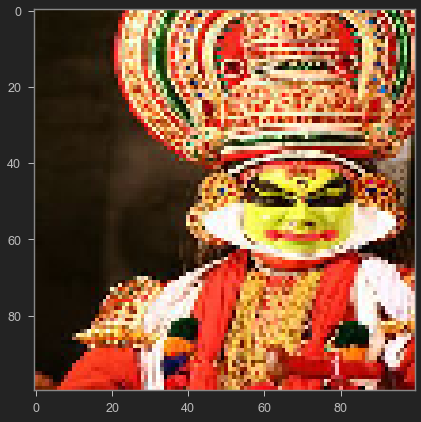

In [423]:
print(Y_train[3])
plt.imshow(X_train[3])

In [424]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.25)

In [84]:
# cnn_model=Sequential()
# cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)))
# cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.3))

# cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.3))

# cnn_model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
# cnn_model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.4))

# cnn_model.add(Flatten())

# cnn_model.add(Dense(units=512,activation='relu'))

# cnn_model.add(Dense(units=512,activation='relu'))

# cnn_model.add(Dense(units=len(Y_train[0]),activation='softmax'))

# cnn_model.summary()

In [369]:
from keras.models import load_model

In [370]:
cnn_model=load_model("./saved_models/worst_model.h5")

In [371]:
cnn_model.load_weights('./saved_models/worst_model.h5')

In [372]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)       

In [373]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.rmsprop(lr=0.0003),metrics=['accuracy'])

In [374]:
history=cnn_model.fit(X_train,Y_train,epochs=5,shuffle=True,batch_size=32,validation_data=(X_val,Y_val))

Train on 273 samples, validate on 91 samples
Epoch 1/5
273/273 [==============================] - 11s 41ms/step - loss: 0.8600 - accuracy: 0.8571 - val_loss: 0.6023 - val_accuracy: 0.8681
Epoch 2/5
273/273 [==============================] - 11s 41ms/step - loss: 0.3945 - accuracy: 0.8901 - val_loss: 0.6421 - val_accuracy: 0.9011
Epoch 3/5
273/273 [==============================] - 11s 41ms/step - loss: 0.2164 - accuracy: 0.9414 - val_loss: 0.5639 - val_accuracy: 0.9121
Epoch 4/5
273/273 [==============================] - 11s 42ms/step - loss: 0.1187 - accuracy: 0.9707 - val_loss: 0.6683 - val_accuracy: 0.9121
Epoch 5/5
273/273 [==============================] - 12s 43ms/step - loss: 0.0489 - accuracy: 0.9817 - val_loss: 0.8158 - val_accuracy: 0.9011


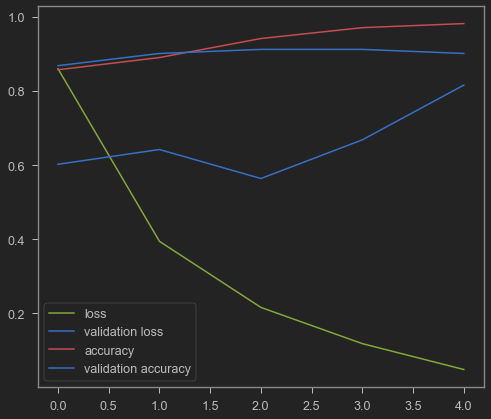

In [375]:

plt.plot(history.history['loss'],'g',label='loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')

plt.plot(history.history['accuracy'],'r',label='accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.legend()

In [376]:
predict=cnn_model.predict_classes(X_test)

In [377]:
predict=le.inverse_transform(predict)

In [378]:
worst_model=pd.DataFrame({'Image':df_test_id,'target':predict})
worst_model.to_csv("worst_model.csv",index=False)

### saving the model

In [48]:
directory=os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory,'worst_model.h5')
cnn_model.save(model_path)

### using data Augmentation

In [117]:
datagen=ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
                            )

In [51]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train,Y_train,batch_size=32),epochs=45)

In [58]:
predict=cnn_model.predict_classes(X_test)

In [59]:
predict=le.inverse_transform(predict)

In [60]:
aug_model=pd.DataFrame({'Image':df_test_id,'target':predict})
aug_model.to_csv("aug_model.csv",index=False)

In [61]:
directory=os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory,'augmented_model.h5')
cnn_model.save(model_path)

### Resnet Model

In [425]:
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

### Transfer learning using pretrained weights

In [433]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [389]:
# y = model.output
# y = Flatten()(y)
# y = Dropout(0.5)(y)
# y = Dense(8, activation='softmax')(y)
# new_model = Model(inputs=model.input, outputs=y)
# new_model.summary()

In [434]:
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(512,activation='relu')(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(8,activation='softmax')(d1)
new_model=Model(input=model.input,outputs=fc2)
new_model.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_21[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

C:\Users\scsur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """


In [435]:
adam=Adam(lr=0.001)
new_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [436]:
for ix in range(len(new_model.layers)):
    print(ix,new_model.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x000001FA137E6B08>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x000001FA570E3948>
2 <keras.layers.convolutional.Conv2D object at 0x000001FAD47602C8>
3 <keras.layers.normalization.BatchNormalization object at 0x000001FA28EBDAC8>
4 <keras.layers.core.Activation object at 0x000001FA0FA065C8>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x000001FA8449F308>
6 <keras.layers.pooling.MaxPooling2D object at 0x000001FA0F4A54C8>
7 <keras.layers.convolutional.Conv2D object at 0x000001FAE9B4E2C8>
8 <keras.layers.normalization.BatchNormalization object at 0x000001FAE9B3F148>
9 <keras.layers.core.Activation object at 0x000001FAE9B3F648>
10 <keras.layers.convolutional.Conv2D object at 0x000001FAE9B3F288>
11 <keras.layers.normalization.BatchNormalization object at 0x000001FAE9B13888>
12 <keras.layers.core.Activation object at 0x000001FAE9B564C8>
13 <keras.layers.convolutional.Conv2D object at 0x000001FAE9B70888>
14 <keras.layers.conv

In [437]:
for layer in new_model.layers:
        layer.trainable = False
    
new_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
new_model.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_21[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
hist=new_model.fit(X_train,
                  Y_train,
                  batch_size=32,
                  epochs=10,
                  validation_data=(X_val,Y_val),
                  shuffle=True)

In [330]:
predict=new_model.predict(X_test)

In [331]:
predict=np.argmax(predict,axis=1)

In [332]:
predict

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [44]:
predict=le.inverse_transform(predict)

In [45]:
resnet_model_trans=pd.DataFrame({'Image':df_test_id,'target':predict})
resnet_model_trans.to_csv("temp.csv",index=False)